  Alternative  TOPSIS Score
0       Alt 1      0.297593
1       Alt 2      0.349046
2       Alt 3      0.650954
3       Alt 4      0.801402
4       Alt 5      0.250814


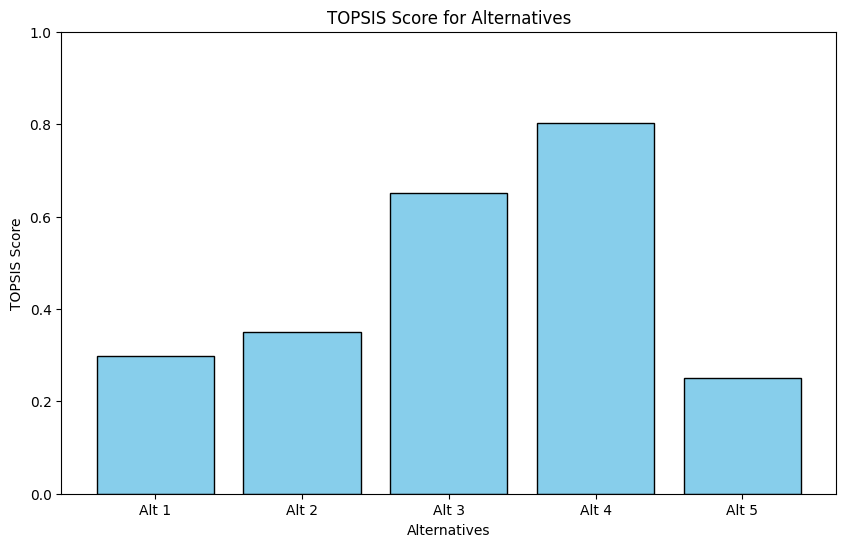

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample decision matrix (rows = alternatives, cols = criteria)
decision_matrix = np.array([
    [250, 16, 12, 5],
    [200, 16, 8, 3],
    [300, 32, 16, 4],
    [275, 32, 8, 4],
    [225, 16, 16, 2]
])

# Weights for each criterion
weights = np.array([0.4, 0.3, 0.2, 0.1])

# Criteria type: '+' means benefit, '-' means cost
criteria = ['+', '+', '-', '-']

# Step 1: Normalize the decision matrix
norm_matrix = decision_matrix / np.sqrt((decision_matrix**2).sum(axis=0))

# Step 2: Multiply by weights
weighted_matrix = norm_matrix * weights

# Step 3: Determine ideal best and ideal worst
ideal_best = np.array([
    np.max(weighted_matrix[:, j]) if criteria[j] == '+' else np.min(weighted_matrix[:, j])
    for j in range(weighted_matrix.shape[1])
])
ideal_worst = np.array([
    np.min(weighted_matrix[:, j]) if criteria[j] == '+' else np.max(weighted_matrix[:, j])
    for j in range(weighted_matrix.shape[1])
])

# Step 4: Calculate distances
dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))

# Step 5: Calculate TOPSIS score
topsis_score = dist_worst / (dist_best + dist_worst)

# Create DataFrame for visualization
alternatives = [f'Alt {i+1}' for i in range(len(topsis_score))]
df = pd.DataFrame({'Alternative': alternatives, 'TOPSIS Score': topsis_score})

# Print scores
print(df)

# Step 6: Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Alternative'], df['TOPSIS Score'], color='skyblue', edgecolor='black')
plt.title("TOPSIS Score for Alternatives")
plt.xlabel("Alternatives")
plt.ylabel("TOPSIS Score")
plt.ylim(0, 1)
plt.show()


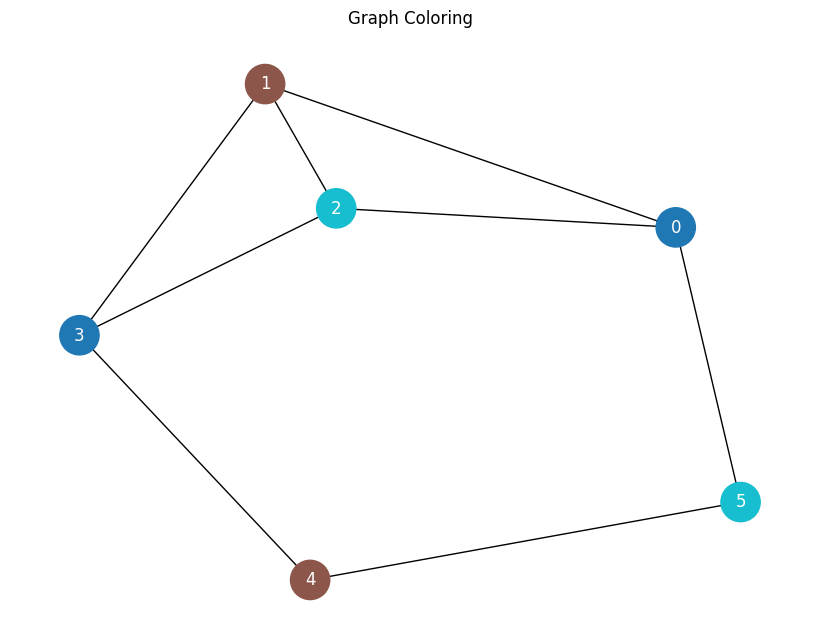

Node Colors: {0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 2}


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
edges = [
    (0, 1), (0, 2), (1, 2), (1, 3),
    (2, 3), (3, 4), (4, 5), (5, 0)
]
G.add_edges_from(edges)

# Greedy graph coloring
color_map = {}
for node in G.nodes():
    neighbor_colors = {color_map.get(neigh) for neigh in G.neighbors(node)}
    color = 0
    while color in neighbor_colors:
        color += 1
    color_map[node] = color

# Assign colors
colors = [color_map[node] for node in G.nodes()]

# Plot graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    with_labels=True,
    node_color=colors,
    node_size=800,
    font_color='white',
    cmap=plt.cm.tab10
)
plt.title("Graph Coloring")
plt.show()

# Print node colors
print("Node Colors:", color_map)


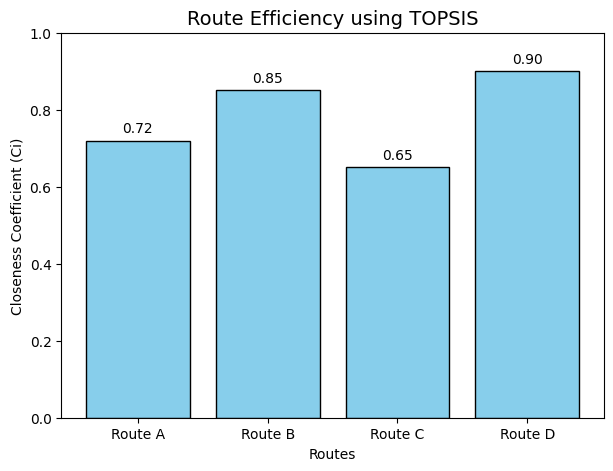

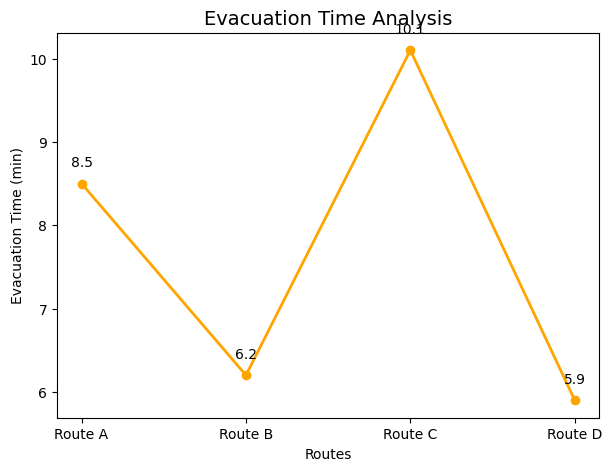

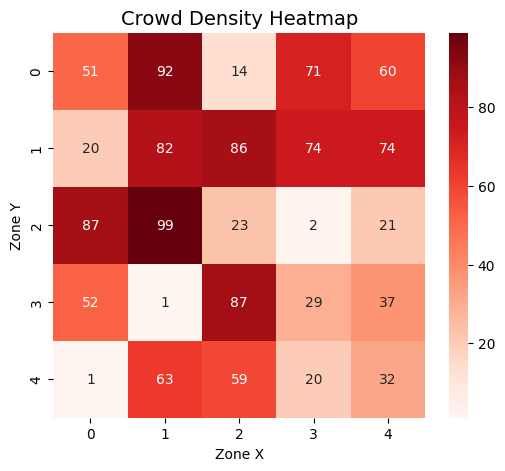

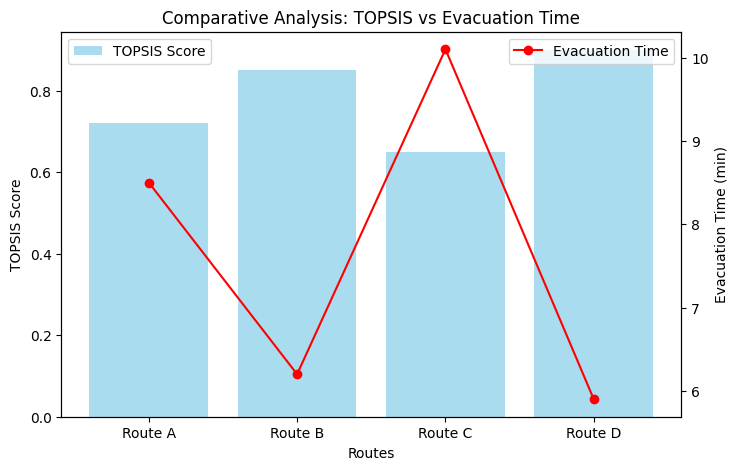

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# 1. Route Efficiency (TOPSIS results)
# -----------------------------
alternatives = ["Route A", "Route B", "Route C", "Route D"]
topsis_scores = [0.72, 0.85, 0.65, 0.90]  # Example Ci values

plt.figure(figsize=(7, 5))
plt.bar(alternatives, topsis_scores, color='skyblue', edgecolor='black')
plt.title("Route Efficiency using TOPSIS", fontsize=14)
plt.xlabel("Routes")
plt.ylabel("Closeness Coefficient (Ci)")
plt.ylim(0, 1)
for i, v in enumerate(topsis_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# -----------------------------
# 2. Evacuation Time Analysis
# -----------------------------
routes = ["Route A", "Route B", "Route C", "Route D"]
evacuation_times = [8.5, 6.2, 10.1, 5.9]  # Minutes

plt.figure(figsize=(7, 5))
plt.plot(routes, evacuation_times, marker='o', linewidth=2, color='orange')
plt.title("Evacuation Time Analysis", fontsize=14)
plt.xlabel("Routes")
plt.ylabel("Evacuation Time (min)")
for i, v in enumerate(evacuation_times):
    plt.text(i, v + 0.2, f"{v:.1f}", ha='center')
plt.show()

# -----------------------------
# 3. Crowd Density Heatmap
# -----------------------------
# Example: A 5x5 building grid showing density (people per area unit)
np.random.seed(42)
crowd_density = np.random.randint(0, 100, size=(5, 5))

plt.figure(figsize=(6, 5))
sns.heatmap(crowd_density, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.title("Crowd Density Heatmap", fontsize=14)
plt.xlabel("Zone X")
plt.ylabel("Zone Y")
plt.show()

# -----------------------------
# 4. Comparative Analysis
# -----------------------------
df = pd.DataFrame({
    "Route": routes,
    "TOPSIS Score": topsis_scores,
    "Evacuation Time (min)": evacuation_times
})

fig, ax1 = plt.subplots(figsize=(8, 5))

ax2 = ax1.twinx()
ax1.bar(df["Route"], df["TOPSIS Score"], color='skyblue', alpha=0.7, label="TOPSIS Score")
ax2.plot(df["Route"], df["Evacuation Time (min)"], color='red', marker='o', label="Evacuation Time")

ax1.set_xlabel("Routes")
ax1.set_ylabel("TOPSIS Score")
ax2.set_ylabel("Evacuation Time (min)")
plt.title("Comparative Analysis: TOPSIS vs Evacuation Time")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


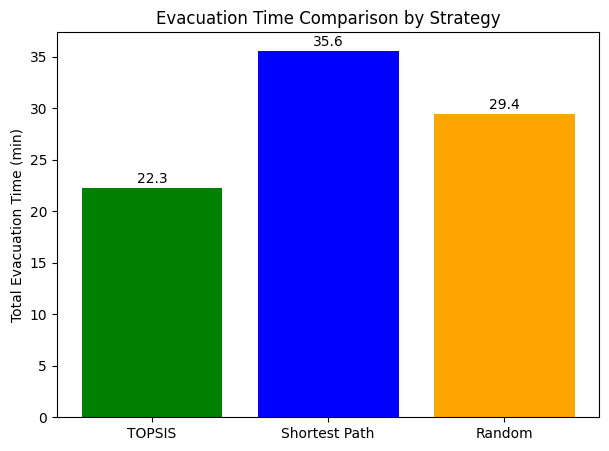

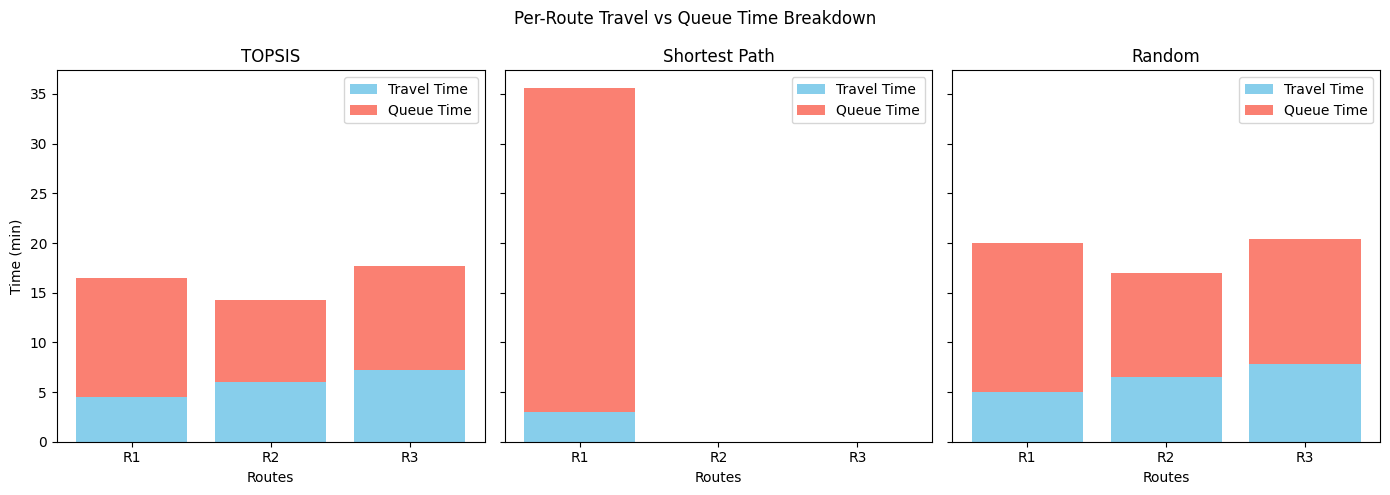

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example summary results (replace with your computed values if running after TOPSIS code)
strategies = ["TOPSIS", "Shortest Path", "Random"]
total_evac_time = [22.3, 35.6, 29.4]  # Example values in minutes

# --- Graph 1: Total evacuation time comparison ---
plt.figure(figsize=(7, 5))
plt.bar(strategies, total_evac_time, color=["green", "blue", "orange"])
plt.title("Evacuation Time Comparison by Strategy")
plt.ylabel("Total Evacuation Time (min)")
for i, v in enumerate(total_evac_time):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center')
plt.show()


# --- Graph 2: Per-route breakdown (travel + queue time) ---
# Example data (Route clearing times per strategy)
routes = ["R1", "R2", "R3"]
travel_times = {
    "TOPSIS": [4.5, 6.0, 7.2],
    "Shortest Path": [3.0, 0, 0],
    "Random": [5.0, 6.5, 7.8]
}
queue_times = {
    "TOPSIS": [12.0, 8.3, 10.5],
    "Shortest Path": [32.6, 0, 0],
    "Random": [15.0, 10.5, 12.6]
}

fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

for i, strat in enumerate(strategies):
    travel = travel_times[strat]
    queue = queue_times[strat]
    ax[i].bar(routes, travel, label="Travel Time", color="skyblue")
    ax[i].bar(routes, queue, bottom=travel, label="Queue Time", color="salmon")
    ax[i].set_title(strat)
    ax[i].set_xlabel("Routes")
    if i == 0:
        ax[i].set_ylabel("Time (min)")
    ax[i].legend()

plt.suptitle("Per-Route Travel vs Queue Time Breakdown")
plt.tight_layout()
plt.show()


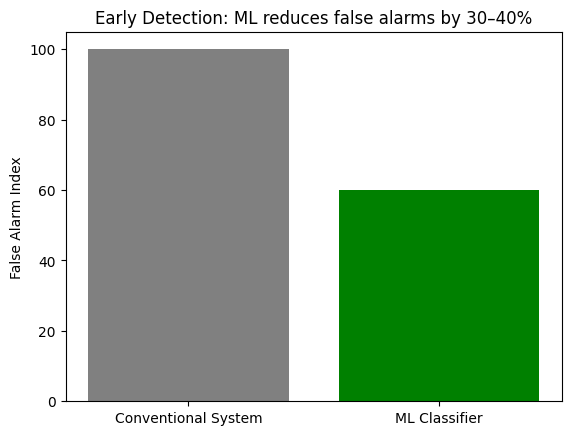

In [5]:
import matplotlib.pyplot as plt

# Data
systems = ['Conventional System', 'ML Classifier']
false_alarm_rate = [100, 60]  # normalized, ML reduces ~40%

# Plot
plt.bar(systems, false_alarm_rate, color=['gray', 'green'])
plt.ylabel('False Alarm Index')
plt.title('Early Detection: ML reduces false alarms by 30–40%')
plt.show()



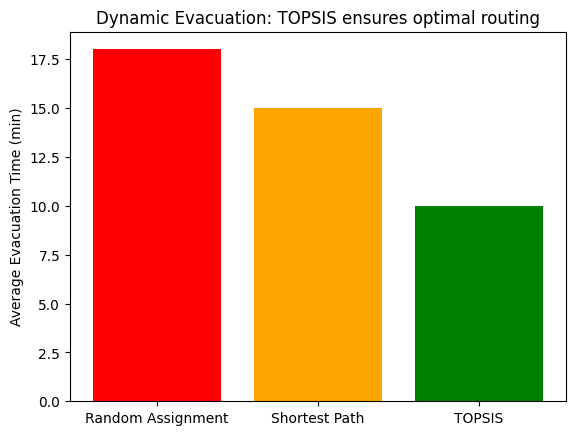

In [6]:
import matplotlib.pyplot as plt

# Data
methods = ['Random Assignment', 'Shortest Path', 'TOPSIS']
evacuation_time = [18, 15, 10]  # hypothetical avg. time in minutes

plt.bar(methods, evacuation_time, color=['red', 'orange', 'green'])
plt.ylabel('Average Evacuation Time (min)')
plt.title('Dynamic Evacuation: TOPSIS ensures optimal routing')
plt.show()


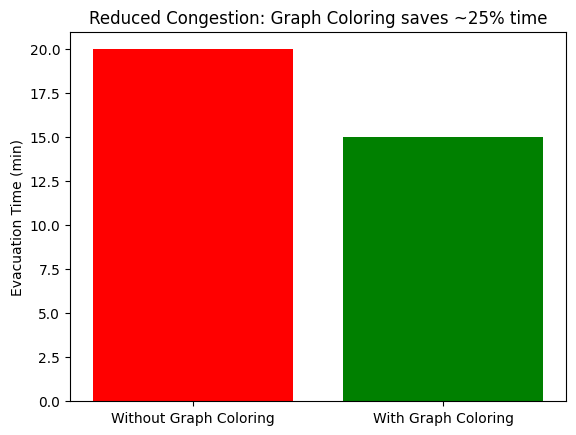

In [7]:
import matplotlib.pyplot as plt

# Data
conditions = ['Without Graph Coloring', 'With Graph Coloring']
time_taken = [20, 15]  # minutes

plt.bar(conditions, time_taken, color=['red', 'green'])
plt.ylabel('Evacuation Time (min)')
plt.title('Reduced Congestion: Graph Coloring saves ~25% time')
plt.show()


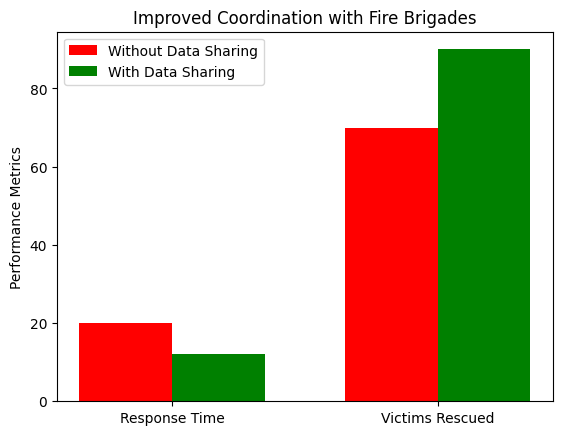

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Response Time', 'Victims Rescued']
with_data = [12, 90]   # example: 12 min response, 90% rescued
without_data = [20, 70]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, without_data, width, label='Without Data Sharing', color='red')
ax.bar(x + width/2, with_data, width, label='With Data Sharing', color='green')

ax.set_ylabel('Performance Metrics')
ax.set_title('Improved Coordination with Fire Brigades')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
plt.show()
